# Clustering

Clustering o agrupamiento es una estrategia de aprendizaje no supervisado en el cual se agrupan elementos que presentan características **similares**.

### Ejemplo:

Tenemos los siguientes serer vivos:
* vaca
* calamar
* perro
* sepia
* petunia
* ornitorrinco
* abeto
* naranjo

Queremos clasificarlos en **3 grupos** basándonos en sus características. Una posible clasificación sería:
* Grupo 1: vaca, perro, ornitorrinco
* Grupo 2: calamar, sepia
* Grupo 3: abeto, naranjo, petunia

Podemos hacer una clasificación jerárquica basada en similitudes:


![](img/organismos.png)

## Distancias

Antes de podes agrupar elementos por su similitud tenemos que definir la *similitud*. Para ello vamos a crear una media de la diferencia, de como de separados están dos elementos del grupo. Ejemplos de distancias:
* Distancia Euclídea: $\left \|  \vec{a}-\vec{b} \right \|_2 = \sqrt{\sum_i \left ( a_i-b_i \right )^2}$
* Distancia Manhattan: $\left \|  \vec{a}-\vec{b} \right \| =  \sum_i \left \| a_i-b_i \right \| $
* Distancia Minkowsky: $\left \|  \vec{a}-\vec{b} \right \|_p = \left ( \sum_i \mid a_i-b_i \mid^p \right )^\frac{1}{p}$
![](img/distancia.png)

Distancia con textos:
* Distancia Hamming: La distancia de hamming entre dos cadenas de igual longitud es el número de posiciones en el cual los simbolos son diferentes.
* Distancia Levenshtein: La distancia Levenshtein entre dos palabras es el mínimo número de ediciones de un solo caracter (inserción, eliminación o sustitución) para que las dos palabras sean iguales.

## Métodos de clustering

### Particionado

#### K-means

Se basa en centroides. El centroide o centro geométrico es el punto resultante de la media aritmética de la posición de todos los puntos.


```
1 - elige k centroides al azar
2 - asigna el elemento al centroide más cercano
3 - recalcular centroides
4 - Repetir desde 2 mientras los centroides se sigan actualizando.
```

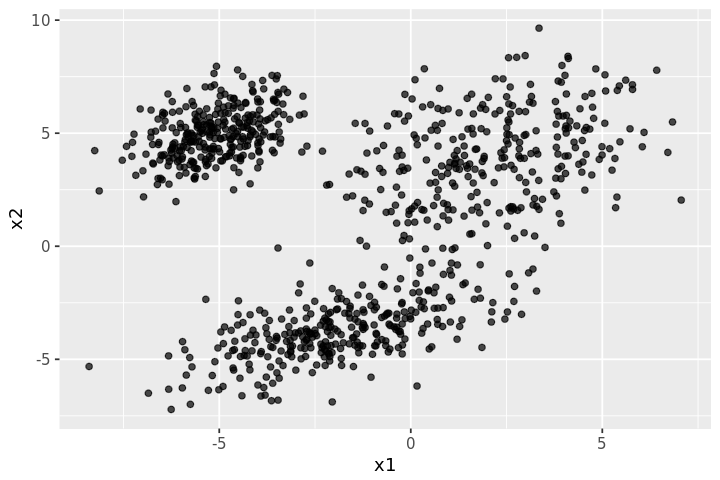

In [1]:
options(repr.plot.height=4,repr.plot.width=6)


N<-300
x1<-c(rnorm(N,mean=2,sd=2),rnorm(N,mean=-2,sd=2),rnorm(N,mean=-5,sd=1))
x2<-c(0.4*x1+c(rnorm(N,mean=3,sd=2),rnorm(N,mean=-3,sd=1),rnorm(N,mean=7,sd=1)))
df<-data.frame(x1,x2)

library(ggplot2)
ggplot(data=df, aes(x=x1,y=x2))+geom_point(alpha=0.7)

x1,x2
-4.9031919,3.245285
-0.6096905,-2.406171
2.6575274,4.931422


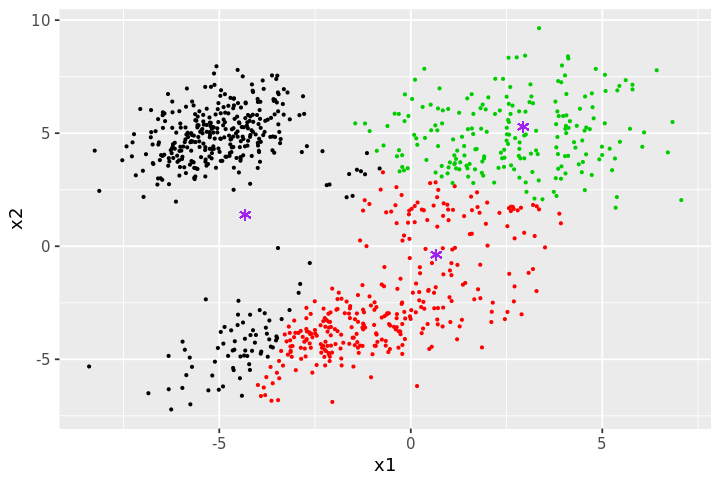

In [24]:
mydistance<-function(v1,v2){
        sqrt((v1[1]-v2[1])^2+(v1[2]-v2[2])^2)
}

assign_points_to_centroid<-function(mydata,centroids){        
    group<-rep(NA,nrow(mydata))
    for (i in 1:nrow(mydata)){
        distance_to_centroids<-rep(NA,nrow(centroids))
        for (j in 1:nrow(centroids)){
            distance_to_centroids[j]<-mydistance(mydata[i,],centroids[j,])
        }        
        group[i]<-which.min(distance_to_centroids)
    }   
    group
}

get_new_centroids<-function(mydata,group){
    k<-length(unique(group))
    centroids<-data.frame(x1=rep(NA,k),x2=rep(NA,k))
    for (i in 1:k){
        idx<-which(i == group)        
        centroids[i,]<-colMeans(mydata[idx,])
    }
    centroids
}

plot_all<-function(mydata,centroids,group){
    mydata$group<-factor(group)
    mydata$centroidx1<-centroids$x1[group]
    mydata$centroidx2<-centroids$x2[group]
    ggplot(data=mydata,aes(x=x1,y=x2))+geom_point(color=group,size=0.5)+
        geom_point(aes(x=centroidx1,y=centroidx2),shape="*",size=5,color="purple")
        #geom_point(aes(x=centroids$x1[1],y=centroids$x2[1]),shape="*",size=5,color="purple")
}


#centroids<-data.frame(x1=c(1,2),x2=c(1,1))
#centroids<-data.frame(x1=c(1,2,3),x2=c(1,1,1))
#centroids
group<-assign_points_to_centroid(df,centroids)
plot_all(df,centroids,group)

centroids<-get_new_centroids(df,group)
centroids

Este algorimo lo implementa R:
```
kmeans(data.frame, k)
```

In [18]:
myclust<-kmeans(df,3)
print("Los centroides son:")
myclust$centers
myclust

[1] "Los centroides son:"


,x1,x2
1,-5.049818,4.950764
2,2.224536,4.017908
3,-1.896931,-3.703824


K-means clustering with 3 clusters of sizes 306, 285, 309

Cluster means:
         x1        x2
1 -5.049818  4.950764
2  2.224536  4.017908
3 -1.896931 -3.703824

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
[112] 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 3 2 2 2 2 2 2 1 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 3 2 2 2
[297] 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[334] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[371] 3 3 3 3 3 3 

### Medidas de la calidad de un cluster

Un cluster tiene que cumplir dos propiedades:
* Los elementos dentro de un mismo grupo tienen que estar lo más cerca posible entre si. La distancia media *intracluster* tiene que ser baja.
![](img/intragrupo.png)

* Los elementos de distintos grupos tienen que estar lo más lejos posibles uno de otro. La distancia media *intercluster* tiene que ser alta.
![](img/intergrupo.png)


Una forma de medirlo es con el SSE (Sum Square Errors).

* $SSE_{intra}$: Se define para cada grupo. Es la suma de errores cuadrádicos entre los puntos de un cluster y el centroide.
* $SSE_{inter}$: Se define para todos. Es la suma de errores cuadrádicos entre los centroides de un cluster (ponderado al número de elementos del cluster) y el centroide de los centroides.
* $SSE_{total}$: k·$SSE_{intra}$+$SSE_{inter}$

Una forma de medir la calidad de un cluster es el ratio:
\\[
\frac{SSE_{inter}}{SSE_{total}}
\\]
Cuanto más cercano a 1, mejor es la división entre clusters

In [26]:
sse_per_cluser<-function(mydata_all,group,centroids){
    ssq<-rep(NA,nrow(centroids))
    for (k in 1:nrow(centroids)){
        mydata<-mydata_all[group==k,]
        h<-0
        for (i in 1:nrow(mydata)){            
            h<-h+sum((mydata[i,]-centroids[k,])^2)
        }        
        ssq[k]<-h
    }
    ssq
}
sse_per_cluser(df,group,centroids)
sse_per_cluser(df,myclust$cluster,myclust$centers)

[1] 5904.477 2813.577 1171.043

[1]  766.476 2193.256 1876.670

In [27]:
sse_betweeness<-function(group,centroids){
    sum((centroids[group,1]-mean(centroids[group,1]))^2)+
    sum((centroids[group,2]-mean(centroids[group,2]))^2)
}
sse_betweeness(group,centroids)
sse_betweeness(myclust$cluster,myclust$centers)

[1] 16569.22

[1] 21621.92

### Determinando el número óptimo de clusters para k-means

No existe una regla fija para determinar el número de grupos. Podemos pintar como evoluciona el error cuadrádico y cuando deje de mejorar rápidamente establecer como el número de clusters.

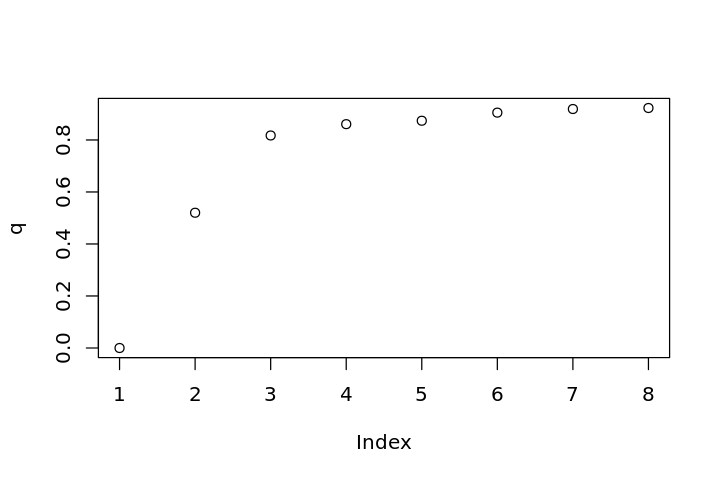

In [28]:
q<-c()
for (k in 1:8){
    myclust<-kmeans(df,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

#### Ejemplo Iris

Conjunto de datos de iris (de Fisher o Anderson) da las medidas en centímetros de las variables longitud y ancho del sépalo y longitud y ancho del pétalo, respectivamente, para 50 flores de cada una de las 3 especies de iris. Las especies son Iris setosa, versicolor y virginica.

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

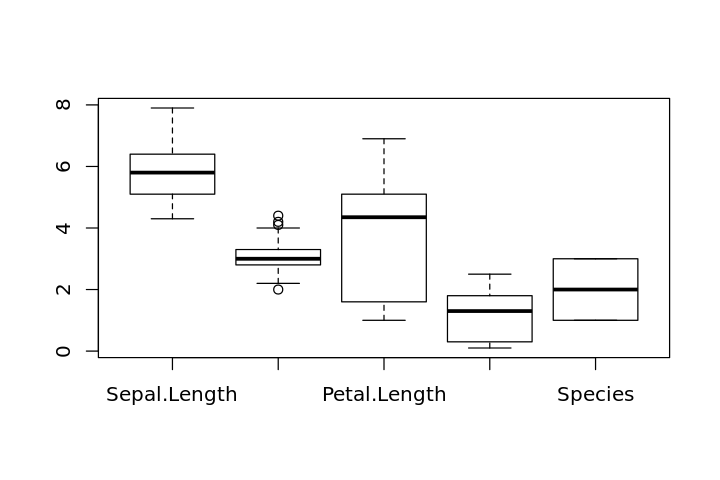

In [20]:
boxplot(iris)
summary(iris)

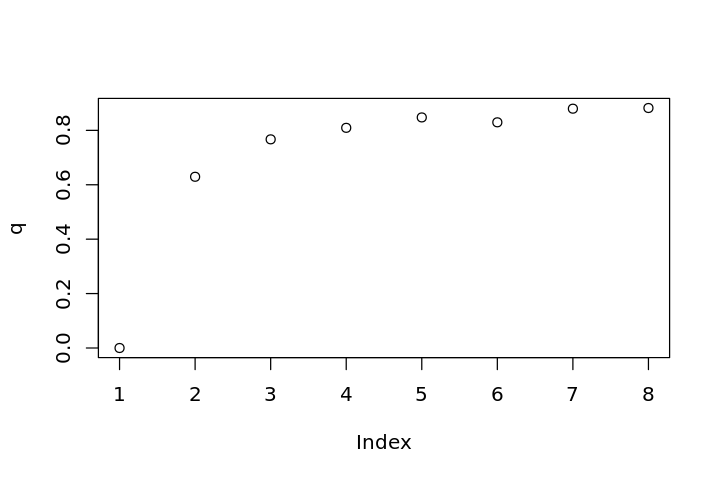

In [34]:
iris_data<-iris[,1:4]
myclust<-kmeans(iris_data,5)

for (i in 1:ncol(iris_data)){
    mn<- mean(iris_data[,i],na.rm=T)
    sd<- sd(iris_data[,i],na.rm=T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd
    
}

q<-c()
for (k in 1:8){
    myclust<-kmeans(iris_data,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)


In [62]:
myclust<-kmeans(iris_data,4)
table(iris$Species, myclust$cluster)

            
              1  2  3  4
  setosa      0 49  1  0
  versicolor  2  0 19 29
  virginica  27  0  2 21

#### Ejemplo proteinas

https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

El conjunto de datos consiste en los niveles de expresión de 77 proteínas / modificaciones de proteínas que producen señales detectables en la fracción nuclear de la corteza. Hay 38 ratones de control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos, se registraron 15 mediciones de cada proteína por muestra / ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 mediciones, y para los ratones trisómicos, hay 34x15 o 510 mediciones. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medida se puede considerar como una muestra / mouse independiente.

Las ocho clases de ratones se describen en función de características como genotipo, comportamiento y tratamiento. De acuerdo con el genotipo, los ratones pueden ser de control o trisómicos. De acuerdo con el comportamiento, algunos ratones han sido estimulados para aprender (shock de contexto) y otros no (contexto de choque) y para evaluar el efecto de la droga memantina en la recuperación de la capacidad de aprender en ratones trisómicos, algunos ratones han sido inyectado con la droga y otros no.

Classes: 
* c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
* c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
* c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
* c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 

* t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
* t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
* t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
* t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 



In [52]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]

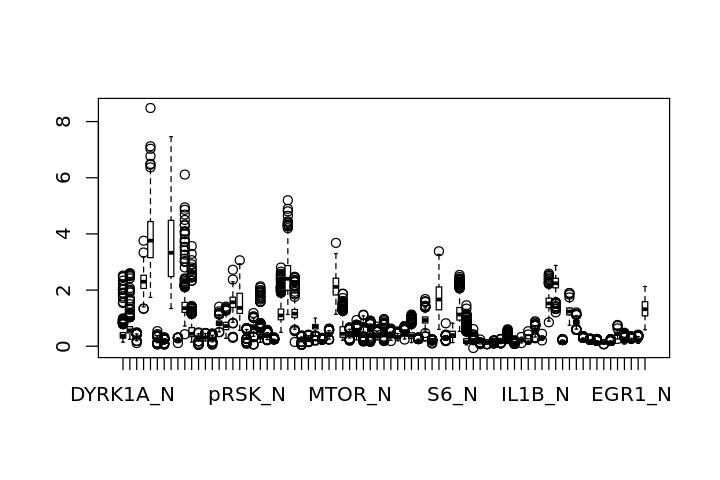

In [53]:
boxplot(mouse_data)

In [57]:
for (i in 1:ncol(mouse_data)){
    mn<- mean(mouse_data[,i],na.rm=T)
    sd<- sd(mouse_data[,i],na.rm=T)
    mouse_data[is.na(mouse_data[,i]),i]<-mn
    
    mouse_data[,i]<-(mouse_data[,i]-mn)/sd    
}

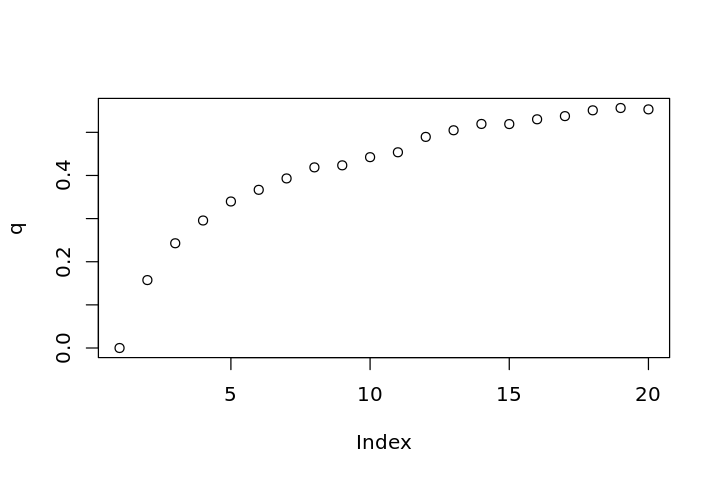

In [59]:
q<-c()
for (k in 1:20){
    myclust<-kmeans(mouse_data,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)


In [61]:
myclust<-kmeans(mouse_data,9)
table(mouse$class, myclust$cluster)

        
          1  2  3  4  5  6  7  8  9
  c-CS-m 33 20 16 15  8 14  0 28 16
  c-CS-s 17 40 15  0  2  0  0 31 30
  c-SC-m  0  0 20 72  1 48  8  0  1
  c-SC-s  9  0 14 62  8 27 15  0  0
  t-CS-m 27 50 35  0  0  0  0 14  9
  t-CS-s 22 43 12  0  0  3  2 12 11
  t-SC-m  0  0  3 52 32 31 10  0  7
  t-SC-s 38  0  9  0 27  5 38  0 18

## Algoritmos jerárquicos

Se basa en la idea central de que los objetos están más relacionados con objetos cercanos que con objetos más alejados. Estos algoritmos conectan "objetos" para formar "clusters" en función de su distancia. Hay dos enfoques para abordar este problema de agrupamiento:

* Aglomerativo (de abajo arriba): cada elemento comienza en su propio clúster. Iterativamente, los clústeres más similares se fusionan para finalizar con un gran clúster que contiene todos los elementos.
* Divisivo (de arriba hacia abajo): todos los elementos pertenecen al mismo grupo. Este clúster se divide iterativamente hasta que todos los clusters tengan solo un elemento.

La fusión o división de clusters se realiza en base a diferentes métodos para medir estas similitudes de clusters:

* single-linkage (SLCA): la distancia entre dos clusters es la distancia mínima que existe entre dos elementos que pertenecen a diferentes clusters.
* complete-linkage (CLCA): la distancia entre dos clústeres es la distancia máxima que existe entre dos elementos que pertenecen a diferentes clústeres.
* average-linkage (UPGMA): la distancia entre dos clusters es la distancia promedio que existe desde cualquier elemento en el primer clúster a cualquier elemento en el otro clúster.
* cendroid-linkage (UPGMC): la distancia entre dos clusters es la distancia que existe entre los centroinds de cada cluster.

![](img/organismos.png)

### Ejemplo Iris

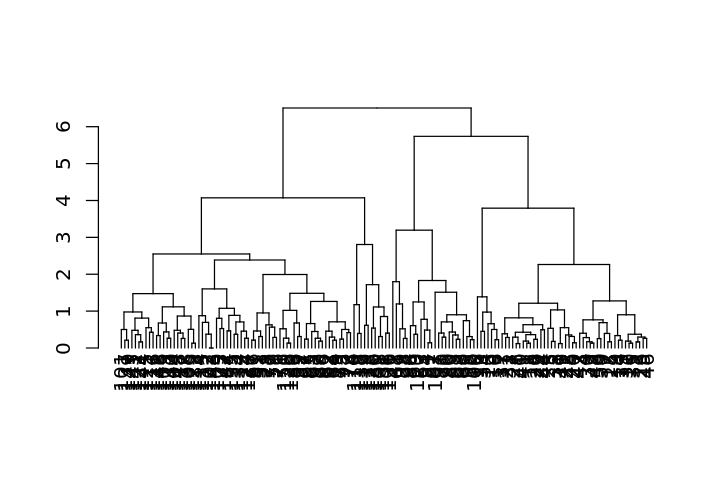

In [66]:
d <- dist(as.matrix(iris_data),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

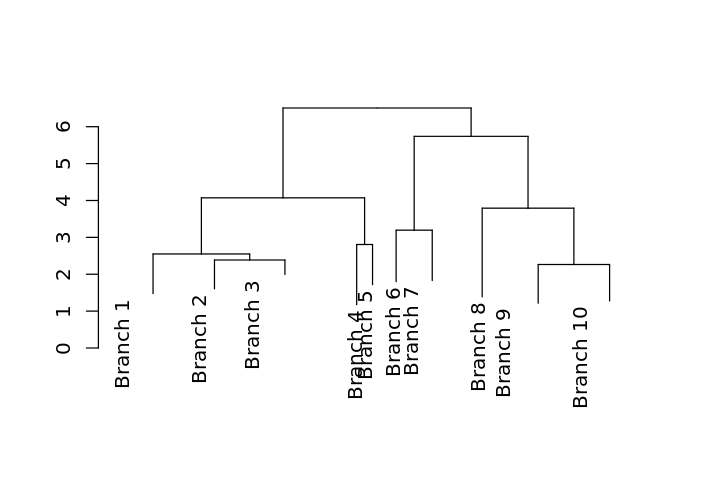

In [67]:
plot(cut(hcd,h=2)$upper)

In [68]:
cut(hcd,h=2)$lower

[[1]]
'dendrogram' with 2 branches and 22 members total, at height 1.473958 

[[2]]
'dendrogram' with 2 branches and 15 members total, at height 1.602231 

[[3]]
'dendrogram' with 2 branches and 29 members total, at height 1.9935 

[[4]]
'dendrogram' with 2 branches and 3 members total, at height 1.176572 

[[5]]
'dendrogram' with 2 branches and 8 members total, at height 1.717484 

[[6]]
'dendrogram' with 2 branches and 5 members total, at height 1.798563 

[[7]]
'dendrogram' with 2 branches and 19 members total, at height 1.829634 

[[8]]
'dendrogram' with 2 branches and 7 members total, at height 1.38744 

[[9]]
'dendrogram' with 2 branches and 22 members total, at height 1.214102 

[[10]]
'dendrogram' with 2 branches and 20 members total, at height 1.276517 


In [71]:
table(iris$Species,cutree(hc,4))

            
              1  2  3  4
  setosa     49  1  0  0
  versicolor  0 21 29  0
  virginica   0  2 37 11

#### Ejemplo proteinas

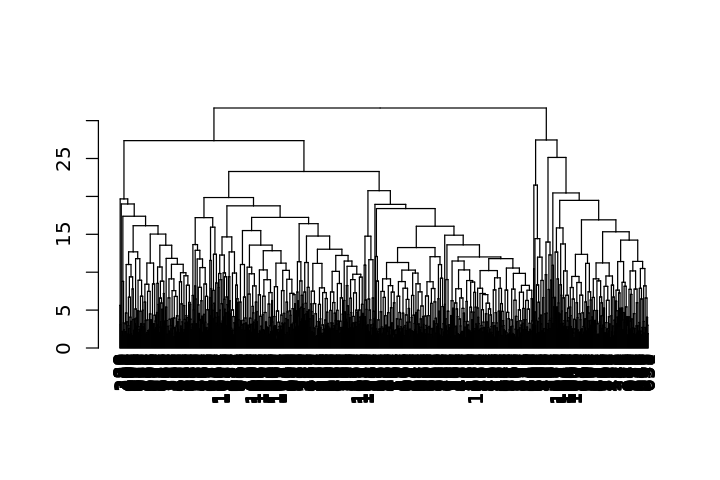

In [72]:
d <- dist(as.matrix(mouse_data),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(hcd)

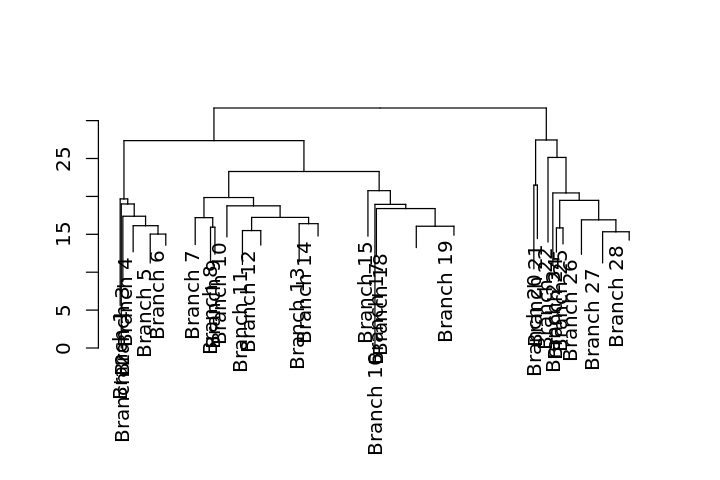

In [73]:
plot(cut(hcd,h=15)$upper)

In [75]:

table(mouse$class,cutree(hc,h=20))

        
          1  2  3  4  5  6  7  8  9
  c-CS-m 49 38 24 39  0  0  0  0  0
  c-CS-s 24 24 30 25  0 15  5 12  0
  c-SC-m  1 69  5 73  2  0  0  0  0
  c-SC-s 15 67  5 33  0  0  0  0 15
  t-CS-m 23 43 47 22  0  0  0  0  0
  t-CS-s  9 51 18 24  0  0  0  3  0
  t-SC-m 38 28  0 69  0  0  0  0  0
  t-SC-s 33  4 18 67  0  0  0  6  7

# Principal Component Analysis

### Cambio de bases ortogonales

Supongamos tenemos los siguientes puntos en un espacio vectorial euclideo:

\\[
\vec{p}_1=\begin{bmatrix}
1\\ 
1
\end{bmatrix}
\;\;\;\;
\vec{p}_2=\begin{bmatrix}
-1\\ 
1
\end{bmatrix}
\;\;\;\;
\vec{p}_3=\begin{bmatrix}
0\\ 
-1
\end{bmatrix}
\;\;\;\;
\vec{p}_4=\begin{bmatrix}
1\\ 
0
\end{bmatrix}
\\]

Estos vectores los podemos agrupar en una matrix $X$:
\\[
X=\begin{bmatrix}
{\vec{p}_1}^\intercal\\ 
{\vec{p}_2}^\intercal\\ 
{\vec{p}_3}^\intercal\\ 
{\vec{p}_4}^\intercal
\end{bmatrix}=
\begin{bmatrix}
1&1\\ 
-1&1\\ 
0&-1\\ 
1&0
\end{bmatrix}
\\]

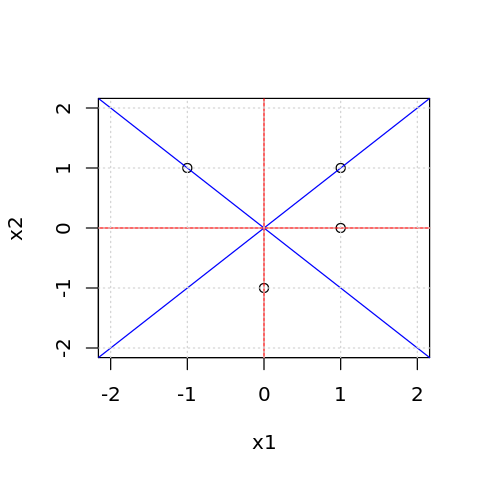

In [166]:
p1<-matrix(c(1,1),ncol=1)
p2<-matrix(c(-1,1),ncol=1)
p3<-matrix(c(0,-1),ncol=1)
p4<-matrix(c(1,0),ncol=1)
X<-rbind(t(p1),t(p2),t(p3),t(p4))
options(repr.plot.height=4,repr.plot.width=4)
plot(X[,1],X[,2],xlim=c(-2,2),ylim = c(-2,2),xlab="x1",ylab="x2")
abline(c(0,1),col="blue")
abline(c(0,-1),col="blue")
abline(h=0,col="red")
abline(v=0,col="red")
grid()


Pero queremos cambiar el eje, queremos realizar una transformación lineal del espacio vectorial.
Nuestro nuevo espacio vectorial vendrá dado por los vectores ortonormales:
\\[
\vec{u}_1=\begin{bmatrix}
\frac{1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}
\end{bmatrix}
\;\;\;\;
\vec{u}_2=\begin{bmatrix}
\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}
\end{bmatrix}
\\]

In [148]:
u1<-matrix(c( 1/sqrt(2),1/sqrt(2)),ncol=1)
u2<-matrix(c(-1/sqrt(2),1/sqrt(2)),ncol=1)
paste("Son normales porque su norma es ",sum(u1^2))
paste("Son ortogonales porque su producto escalar es ",t(u1) %*% u2)

[1] "Son normales porque su norma es  1"

[1] "Son ortogonales porque su producto escalar es  0"

Los puntos $p_x$ de nuestro espacio se pueden representar mediante una combinación lineal de los vectores $\vec{u}_1$ y $\vec{u}_2$.

\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

\\[
\vec{p}_1=\begin{bmatrix}
1\\ 
1
\end{bmatrix}= \sqrt{2}·\vec{u}_1 +  0·\vec{u}_2
\\]
\\[
\vec{p}_2=\begin{bmatrix} 
-1\\ 
1
\end{bmatrix}= 0·\vec{u}_1 +  \sqrt{2}·\vec{u}_2
\\]
\\[
\vec{p}_3=\begin{bmatrix}
0\\ 
-1
\end{bmatrix}= \frac{-1}{\sqrt{2}}·\vec{u}_1 + \frac{-1}{\sqrt{2}}·\vec{u}_2
\\]
\\[
\vec{p}_4=\begin{bmatrix}
1\\ 
0
\end{bmatrix}= \frac{1}{\sqrt{2}}·\vec{u}_1 - \frac{1}{\sqrt{2}}·\vec{u}_2
\\]

Esto nos origina otra matriz con referencia al espacio vectorial $\vec{u_x}$ tal que:
\\[
U=\begin{bmatrix}
\sqrt{2}&0\\ 
0&\sqrt{2}\\ 
\frac{-1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}
\end{bmatrix}
=
\begin{bmatrix}
1&1\\ 
-1&1\\ 
0&-1\\ 
1&0
\end{bmatrix}·
\begin{bmatrix}
\frac{1}{\sqrt{2}}&\frac{-1}{\sqrt{2}}\\ 
\frac{1}{\sqrt{2}}&\frac{1}{\sqrt{2}}
\end{bmatrix}
\\]

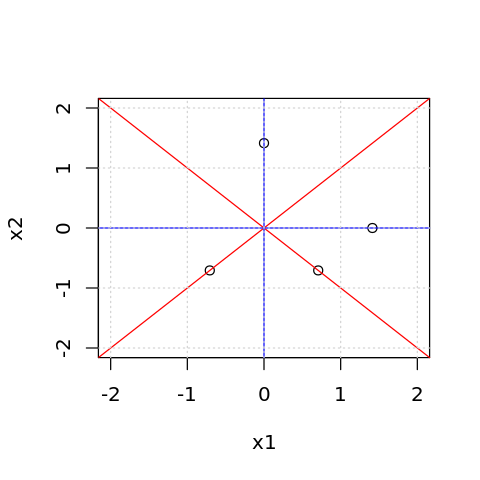

In [170]:
U<-X %*% cbind(u1, u2)
plot(U[,1],U[,2],xlim=c(-2,2),ylim = c(-2,2),xlab="x1",ylab="x2")
abline(c(0,1),col="red")
abline(c(0,-1),col="red")
abline(h=0,col="blue")
abline(v=0,col="blue")
grid()

In [174]:
paste("Si queremos recuperar la variable X original:")
U %*% solve(cbind(u1, u2))

[1] "Si queremos recuperar la variable X original:"

1,1
-1,1
0,-1
1,0


### Distribución de los datos

Los datos no se distribuyen igual entre todas las dimensiones.

Nos interesa encontrar la dirección de máxima variabilidad de los datos para, sobre esa dirección (vector), proyectar nuestros datos.
\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

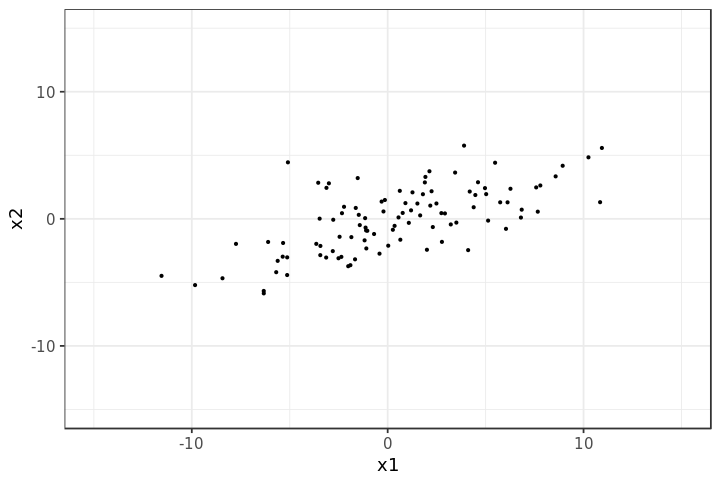

In [77]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

set.seed(123)
N<-100
x1<-c(rnorm(N,mean=0,sd=5))
x2<-c(0.4*x1+rnorm(N,mean=0,sd=2))

mydata<-data.frame(x1,x2)
ggplot(mydata,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()

La dirección de máxima dispersión va a venir dada por la **covarianza**:
##### Covarianza

La covarianza es un valor que indica el grado de variación **lineal** conjunta de dos variables aleatorias respecto a sus medias.

Supongamos que queremos comparar dos variables aleatorias X e Y:
* Tendremos alta covarianza (positiva) cuando, para valores altos de X, tengamos mayoritariamente valores altos de Y
* Tendremos baja covarianza (negativa) cuando, para valores altos de X, tengamos mayoritariamente valores bajos de Y
* Tendremos covarianza cercana a 0, para valores altos de X, los valores de Y pueden ser altos o bajos por igual


Su formula es la siguiente:
\\[
cov(X,Y) = \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)
\\]

Recordemos la formula de la varianza:
\\[
Var(x) =  \frac{1}{N} \sum _{i=1}^N \left( x_i-\bar{x} \right)^2
\\]

La covarianza de una variable aleatoria consigo misma es igual a la varianza:
\\[
cov(X,X) = Var(X)
\\]

En R la calculamos con la función *cov(x,y)*



In [78]:
M<-matrix(c(mydata$x1,mydata$x2),ncol=2)
paste("La covarianza:")
cov(M)
paste("es proporcional al producto de la matriz consigo misma:")
t(M) %*% M

[1] "La covarianza:"

20.830821,7.895118
7.895118,6.723415


[1] "es proporcional al producto de la matriz consigo misma:"

2082.684,780.0670
780.067,665.7356


### Autovectores y autovalores

Un autovector (*eigenvector*) de una matrix $A$, es un vector cuyo valor solo cambia por un escalar $\lambda$, llamado autovalor (*eigenvalue*), cuando se multiplica por la matriz $A$ 

In [79]:
A<-matrix(c(1,1,1,3),ncol=2)
A

1,1
1,3


In [80]:
eigen(A)

0.3826834,-0.9238795
0.9238795,0.3826834


In [81]:
v1<-eigen(A)$vectors[,1]
l1<-eigen(A)$values[1]
A %*% v1

1.306563
3.154322


In [82]:
matrix(l1*v1,ncol=1)

1.306563
3.154322


Esto significa que si tenemos una serie de puntos (en rojo), al ser multiplicados por la matriz $A$ se van a **desplazar** siguiendo la **dirección** dada por los autovectores con la **magnitud** dada por los autovalores.

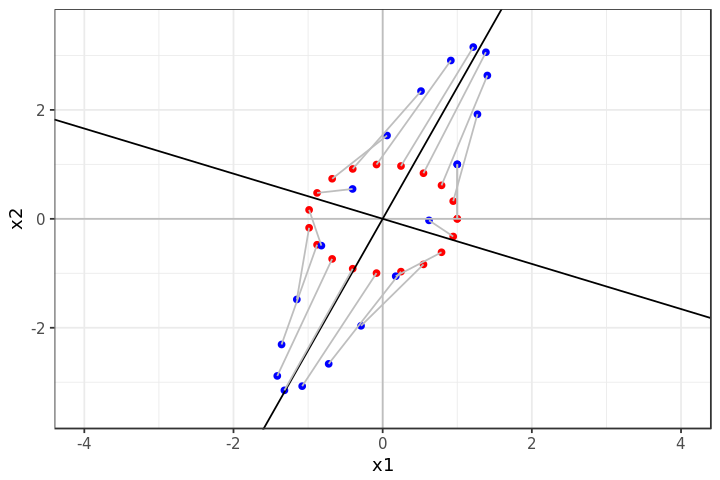

In [83]:
N<-20
df<-data.frame(x1=cos(seq(0,2*pi,length.out = N)),x2=sin(seq(0,2*pi,length.out = N)),
               x1n=rep(NA,N),x2n=rep(NA,N))

for (i in 1:nrow(df)){
    v<-A %*% matrix(unlist(df[i,1:2]),ncol=1)
    df$x1n[i]<-v[1]
    df$x2n[i]<-v[2]
}
eigv<-eigen(A)$vectors

ggplot(df)+geom_point(aes(x=x1,y=x2),color="red")+
    geom_point(aes(x=x1n,y=x2n),color="blue")+
    geom_hline(yintercept = 0,color="gray")+
    geom_vline(xintercept = 0,color="gray")+
    geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="black")+
    geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="black")+
    geom_segment(aes(x = x1, y = x2, xend=x1n,yend=x2n),color="gray")+
    xlim(c(-4,4))+ylim(c(-3.5,3.5))+
    theme_bw()

### Análisis de componentes principales

En este caso vamos a realizar una transformación de nuestros datos originales en un nuevo espacio vectorial.


Nos interesa encontrar la dirección de máxima variabilidad de los datos para, sobre esa dirección (vector), proyectar nuestros datos sobre una base **ortonormal**.

\\[
\vec{p}= \sum_i \alpha_i \vec{u}_i
\\]

Los autovectores de la matriz de covarianza de nuestros datos o $A^\intercal·A$ nos proporcionan esa base vectorial sobre la cual proyectar nuestros datos.
* Cuanto mayor sea el *autovalor*, más importancia, más varianza, tendrá la proyección de los datos sobre el *autovector* correspondiente.
* Los autovectores de la matriz de covarianza se $A$ coinciden con la diagonal de la matriz de covarianza de la proyección de $A$ sobre la base vectorial de *autovectores*

-0.9144180,0.4047711
-0.4047711,-0.9144180


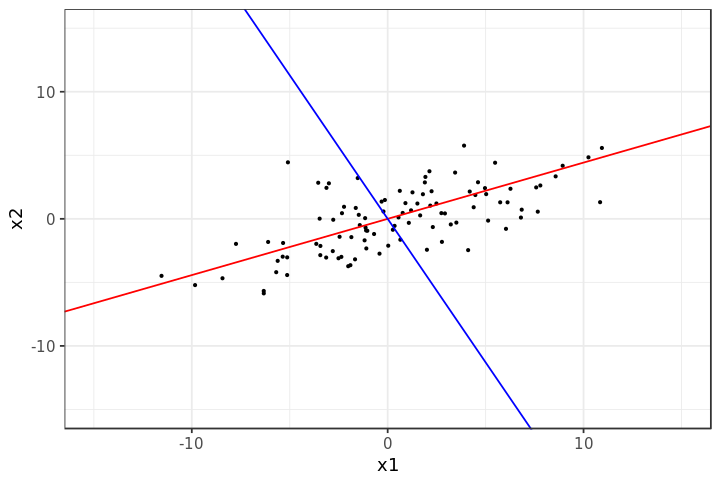

In [85]:
M<-matrix(c(mydata$x1,mydata$x2),ncol=2)
eigv<-eigen(t(M) %*% M)$vector
eigen(t(M) %*% M)

ggplot(mydata,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="red")+
        geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="blue")+
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()

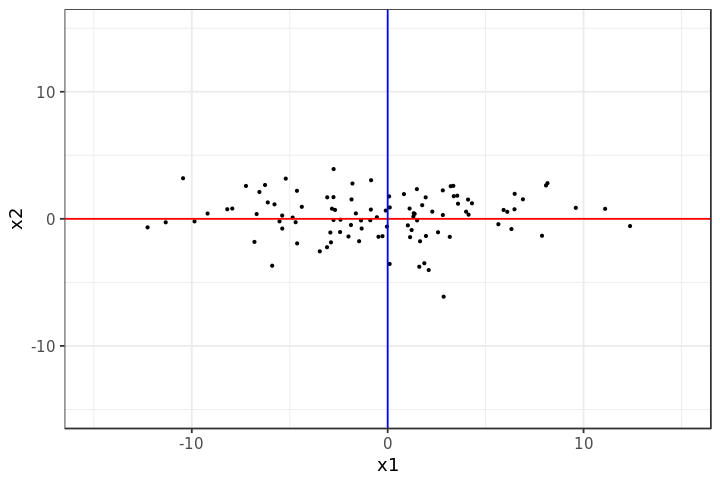

In [87]:
mydata_rot<-data.frame(x1=M %*% eigv[,1],x2=M %*% eigv[,2])

ggplot(mydata_rot,aes(x=x1,y=x2))+geom_point(size=0.5)+    
        geom_hline(yintercept = 0,color="red")+
        geom_vline(xintercept = 0,color="blue")+
        xlim(c(-15,15))+ylim(c(-15,15))+
        theme_bw()

In [88]:
# Los autovectores de la matriz de covarianza de A  coinciden con 
# la diagonal de la matriz de covarianza de la proyección de  A  sobre la base vectorial de autovectores
var(mydata_rot)
eigen(var(M))$values

,x1,x2
x1,24.36390814,0.08647724
x2,0.08647724,3.19032775


[1] 24.364261  3.189975

### Diferencias entre PCA y regresión lineal

La regresión lineal busca minimizar el error cuadrático medio:
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]
En PCA buscamos maximizar la proyección de nuestros datos sobre la nueva base vectorial.

En la siguiente figura se ve claro:
* PCA busca minimizar la distancia de los puntos a la línea roja de forma perpendicular (línea discontinua)
* Regresión linear busca minimizar la distancia de los puntos a la línea verde de forma vertical (línea discontinua)

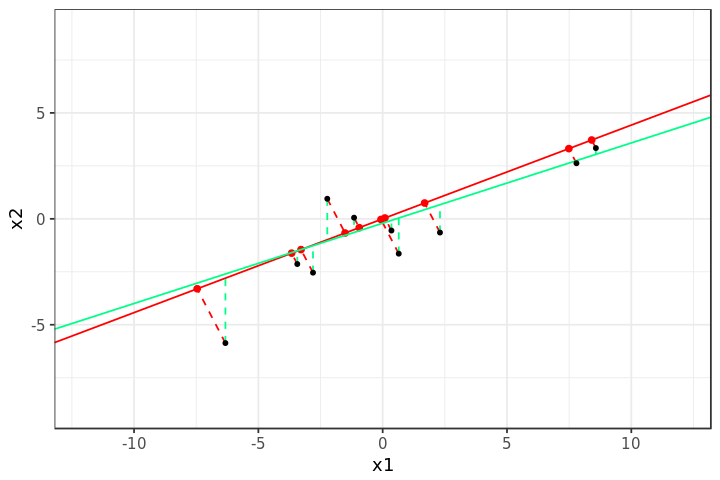

In [92]:

mydata_pca1<-as.data.frame(x=matrix(mydata_rot$x1,ncol=1) %*% t(eigv[,1]))
colnames(mydata_pca1)<-c("x1pca","x2pca")
mydata_total<-cbind(mydata,mydata_pca1)

linear_model<-lm(mydata,formula=x2~x1)
mydata_total$x2lm<-predict(linear_model,mydata)

ggplot(mydata_total[1:10,],aes(x=x1,y=x2))+
        geom_point(aes(x=x1pca,y=x2pca),color="red")+
        geom_abline(intercept = 0,slope = eigv[2,1]/eigv[1,1],color="red")+
        #geom_abline(intercept = 0,slope = eigv[2,2]/eigv[1,2],color="blue")+
        geom_segment(aes(x = x1, y = x2, xend=x1pca,yend=x2pca),color="red",linetype = "dashed")+
        geom_abline(intercept = linear_model$coefficients[1],slope = linear_model$coefficients[2],color="#00FF88")+
        geom_segment(aes(x = x1, y = x2, xend=x1,yend=x2lm),color="#00FF88",linetype = "dashed")+
        geom_point(size=1)+    
        xlim(c(-12,12))+ylim(c(-9,9))+
        theme_bw()

### Calculo en R

En R podemos usar el comando 
```
prcomp(mydata)
```
para hacer un PCA, devuelve 3 listas de interés:
* x : aquí se encuentran los datos de la matriz original proyectados sobre los autovectores. Están ordenados de mayor a menor autovalor.
* sdev: Es la desviación estandard de cada columna de x. Su cuadrado es el correspondiente autovalor de cov(x).
* rotation: matriz con los autovectores


-0.9127573,0.4085023
-0.4085023,-0.9127573


Standard deviations:
[1] 4.952282 1.799090

Rotation:
         PC1        PC2
x1 0.9144180  0.4047711
x2 0.4047711 -0.9144180

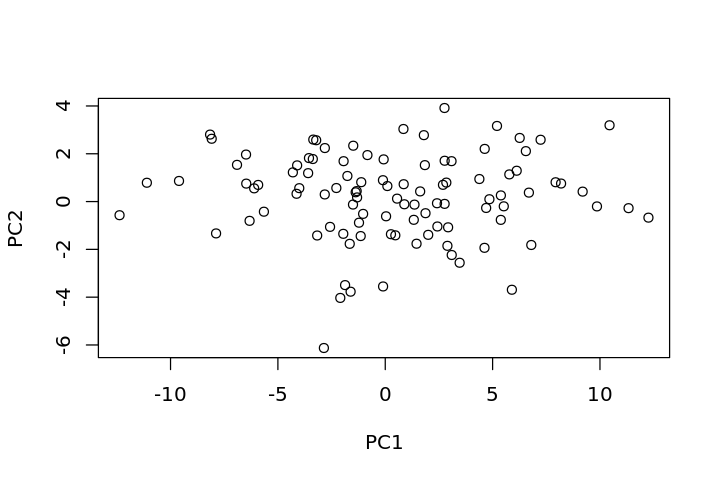

In [94]:
eigen(cov(M))
prmydata<-prcomp(mydata,center = FALSE, scale. = FALSE)
prmydata

plot(prmydata$x[,1:2])

#### Ejemplo Iris

Vamos a aplicar PCA al dataset de Iris

In [96]:
iris_data<-iris[,1:4]
myclust<-kmeans(iris_data,5)

for (i in 1:ncol(iris_data)){
    mn<- mean(iris_data[,i],na.rm=T)
    sd<- sd(iris_data[,i],na.rm=T)
    
    iris_data[,i]<-(iris_data[,i]-mn)/sd    
}

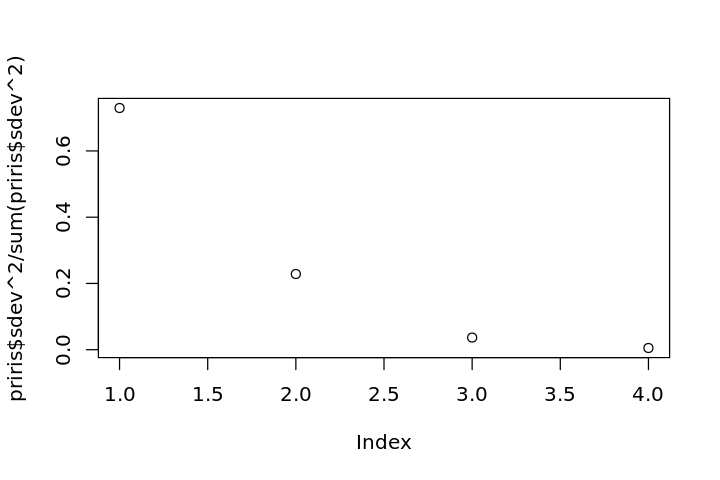

In [100]:
#Utilizamos prcomp para calcular el pca
priris<-prcomp(iris_data, center = FALSE , scale. = FALSE)
#Comprobamos que los dos primeros autovalores contienen aproximadamente el 90% de la varianza
plot(priris$sdev^2/sum(priris$sdev^2))

            
              1  2  3  4
  setosa      1 49  0  0
  versicolor 21  0  1 28
  virginica   2  0 27 21

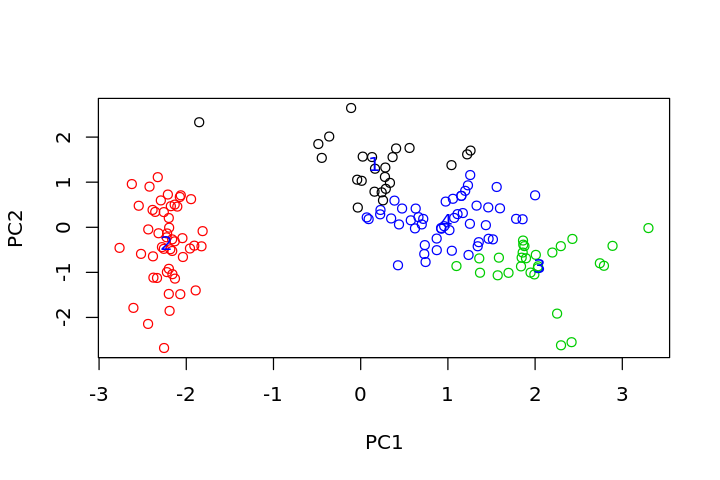

In [106]:
my_clust<-kmeans(priris$x[,c(1:2)],4)
plot(priris$x[,c(1,2)],col=my_clust$cluster)
text(x=my_clust$centers[,1],y=my_clust$centers[,2],
     cex=1, labels=(1:nrow(my_clust$centers)),col="blue")

table(iris$Species, my_clust$cluster)

#### Ejemplo proteinas

Vamos a aplicar PCA al dataset de proteinas

In [121]:
mouse<-read.csv("data/Data_Cortex_Nuclear.csv")
mouse_data<-mouse[,2:78]
for (i in 1:ncol(mouse_data)){
        
    mn<-mean(mouse_data[,i],na.rm = T)
    sd<-sd(mouse_data[,i],na.rm = T)
    mouse_data[is.na(mouse_data[,i]),i]<-mn
    
    mouse_data[,i]<-(mouse_data[,i]-mn)/sd    
}

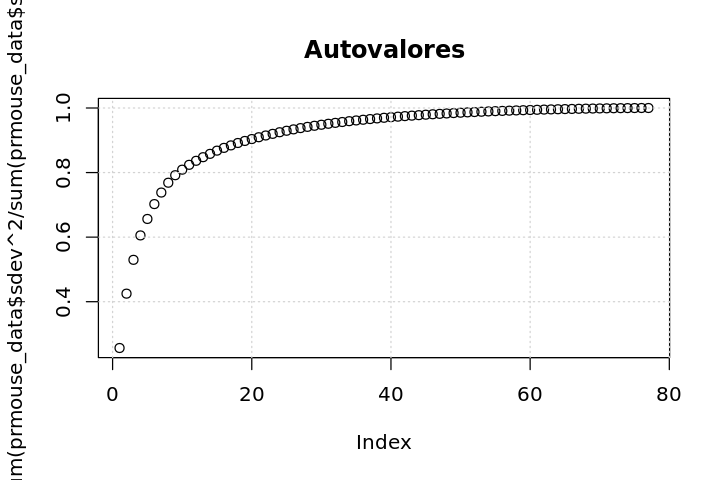

In [122]:
#Utilizamos prcomp para calcular el pca
prmouse_data<-prcomp(mouse_data,center = FALSE, scale. = FALSE)
#Comprobamos que los 20 primeros autovalores contienen aproximadamente el 90% de la varianza
plot(cumsum(prmouse_data$sdev^2/sum(prmouse_data$sdev^2)),main="Autovalores")
grid()

Vamos a probar a hacer un *k-means* con solo dos dimensiones del PCA

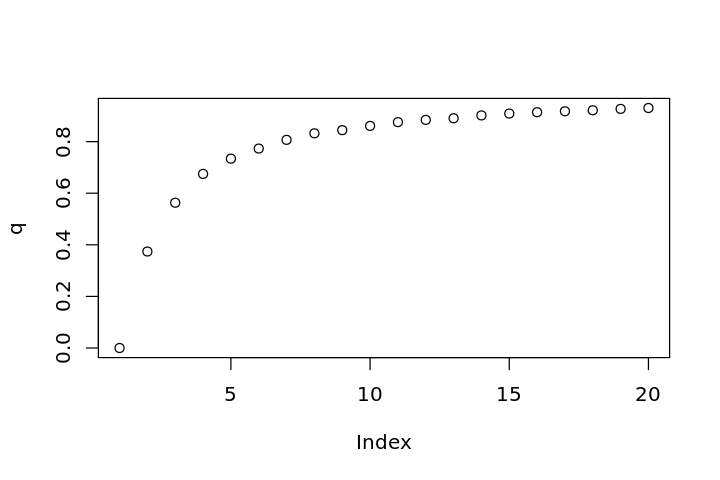

In [123]:
mouse_data14<-prmouse_data$x[,1:2]
q<-c()
for (k in 1:20){
    myclust<-kmeans(mouse_data14,k)
    q[k]<-myclust$betweenss/myclust$totss
}
plot(q)

In [124]:
set.seed(123)
myclustpca<-kmeans(mouse_data14,10)
myclust<-kmeans(mouse_data,10)

table(mouse$class,myclustpca$cluster)
table(mouse$class,myclust$cluster)

        
          1  2  3  4  5  6  7  8  9 10
  c-CS-m 15 18  0 12 42 25 17  4 15  2
  c-CS-s  6 10  0 24 24 29  9  2 31  0
  c-SC-m  3 33 16  0  2  0 48 10  0 38
  c-SC-s 18 18  2  0 14  0 55 16  0 12
  t-CS-m  0  4  0 30 20 15  3 19 44  0
  t-CS-s  0 12  0 24 12 11  3  2 38  3
  t-SC-m 28  9 31  0  1  0 46  0  0 20
  t-SC-s 31 34  5  0 26  0 16 19  0  4

        
          1  2  3  4  5  6  7  8  9 10
  c-CS-m 15 11 18  0 35  0  2 48 18  3
  c-CS-s 22  0  0 15 32  0  0 24 31 11
  c-SC-m  1 58 40  0  0  7 44  0  0  0
  c-SC-s  0 63 27  0  0 19 16  8  1  1
  t-CS-m  2  0  0  0 65  6  3 12 45  2
  t-CS-s 11  0  3  0 39  2  0 15 35  0
  t-SC-m 12 51 29  0  0  9 10  4  0 20
  t-SC-s 11 12  5  0 18 48  0 16  1 24

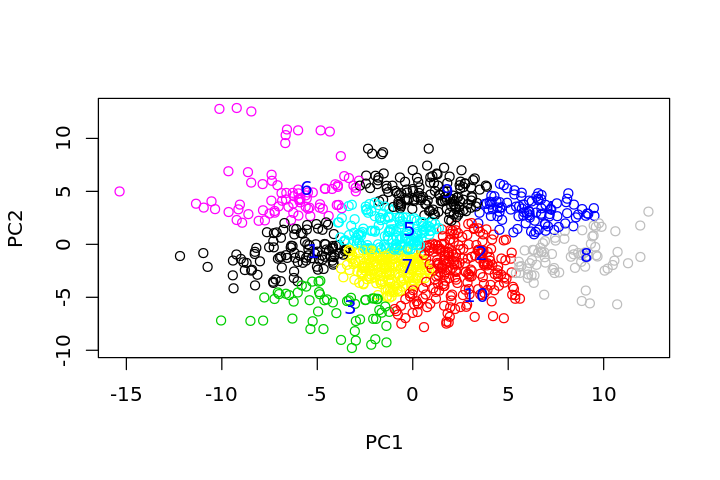

In [125]:
plot(prmouse_data$x[,c(1,2)],col=myclustpca$cluster)
text(x=myclustpca$centers[,1], y=myclustpca$centers[,2], cex=1, pos=4, labels=(1:nrow(myclustpca$centers)),col="blue")


#### Ejemplo regresión logística con PCA - dataset Cancer

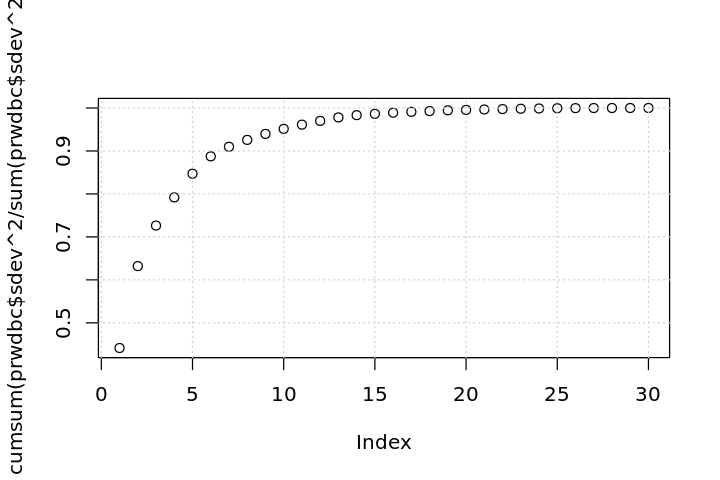

In [114]:
library(pracma)
set.seed(1234)
wdbc<-read.csv("data/wdbc.data",col.names=c("id","diagnosis",paste0("c",1:30)))
diagnosis<-wdbc$diagnosis
wdbc<-wdbc[,3:ncol(wdbc)]

prwdbc<-prcomp(wdbc, center=TRUE, scale. = TRUE)

plot(cumsum(prwdbc$sdev^2/sum(prwdbc$sdev^2)))
grid()

In [118]:
pca_data<-as.data.frame(prwdbc$x[,1:2])
pca_data$diagnosis<-diagnosis

idx<-sample(1:nrow(pca_data),nrow(pca_data)*0.7)
wdbc.train_norm<-pca_data[idx,]
wdbc.test_norm<-pca_data[-idx,]

model_wdbc<-glm(data=wdbc.train_norm,formula = diagnosis ~ ., family=binomial(link='logit'))

y_predict <- predict(model_wdbc, wdbc.test_norm)
y_factor<-as.factor(ifelse(y_predict<0,"B","M"))

table(y_factor,wdbc.test_norm$diagnosis)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

        
y_factor   B   M
       B 109   3
       M   9  50

In [119]:
str(pca_data)

'data.frame':	568 obs. of  3 variables:
 $ PC1      : num  -2.41 -5.76 -7.11 -3.96 -2.38 ...
 $ PC2      : num  3.76 1.05 -10.33 1.94 -3.97 ...
 $ diagnosis: Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...


   
      1   2
  B  16 341
  M 174  37

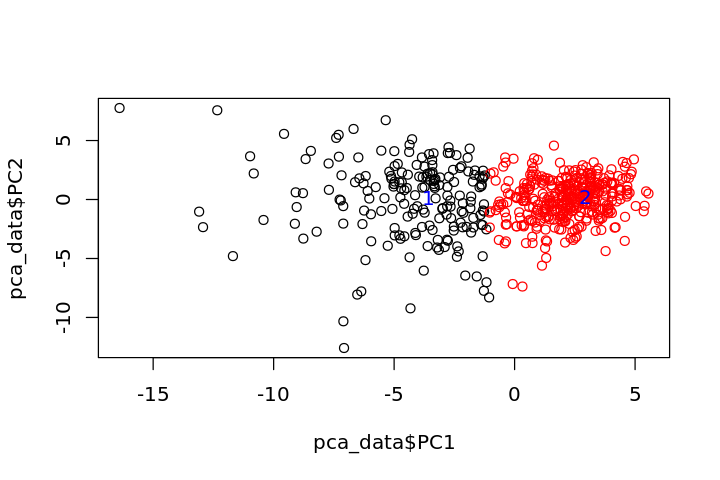

In [120]:
myclustpca<-kmeans(pca_data[,1:2],2)

plot(pca_data$PC1,pca_data$PC2,col=myclustpca$cluster)
text(x=myclustpca$centers[,1], y=myclustpca$centers[,2], cex=1, pos=4, labels=(1:nrow(myclustpca$centers)),col="blue")
table(pca_data$diagnosis,myclustpca$cluster)